In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
}

In [18]:
df = pd.read_csv('./FIFA18_players_database/clean_data.csv')
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,77,45,81,56,60,60,54,30,63,62,...,58,64,26,81,72,25,79,39,50,ST
1,81,42,79,71,57,55,52,46,60,54,...,59,61,21,72,65,21,51,51,41,LM
2,83,71,77,63,70,65,58,49,71,61,...,70,59,63,80,80,67,75,63,70,CM
3,78,36,68,64,62,53,56,51,67,60,...,59,66,32,73,66,29,63,56,52,ST
4,73,71,71,68,59,54,51,49,49,35,...,65,54,63,76,68,65,73,46,46,CDM


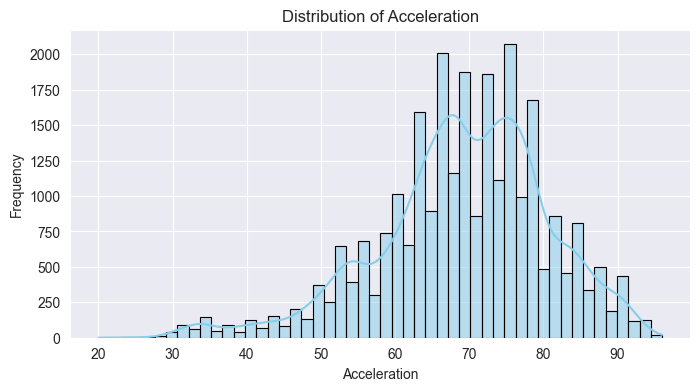

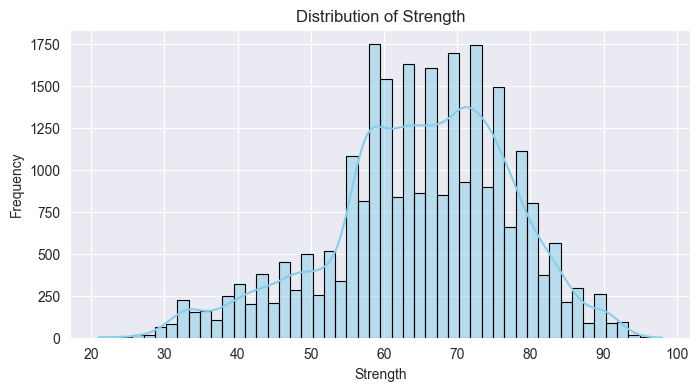

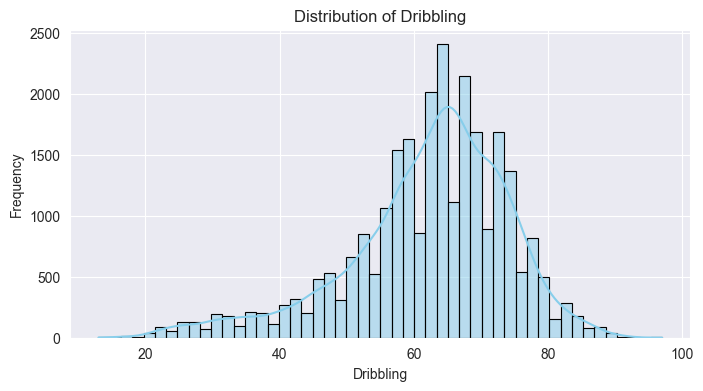

In [19]:
columns_to_plot = ['Acceleration', 'Strength', 'Dribbling']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

All the distribution is right heavy, might not be good when we are feeding this to the Machine Learning Model.

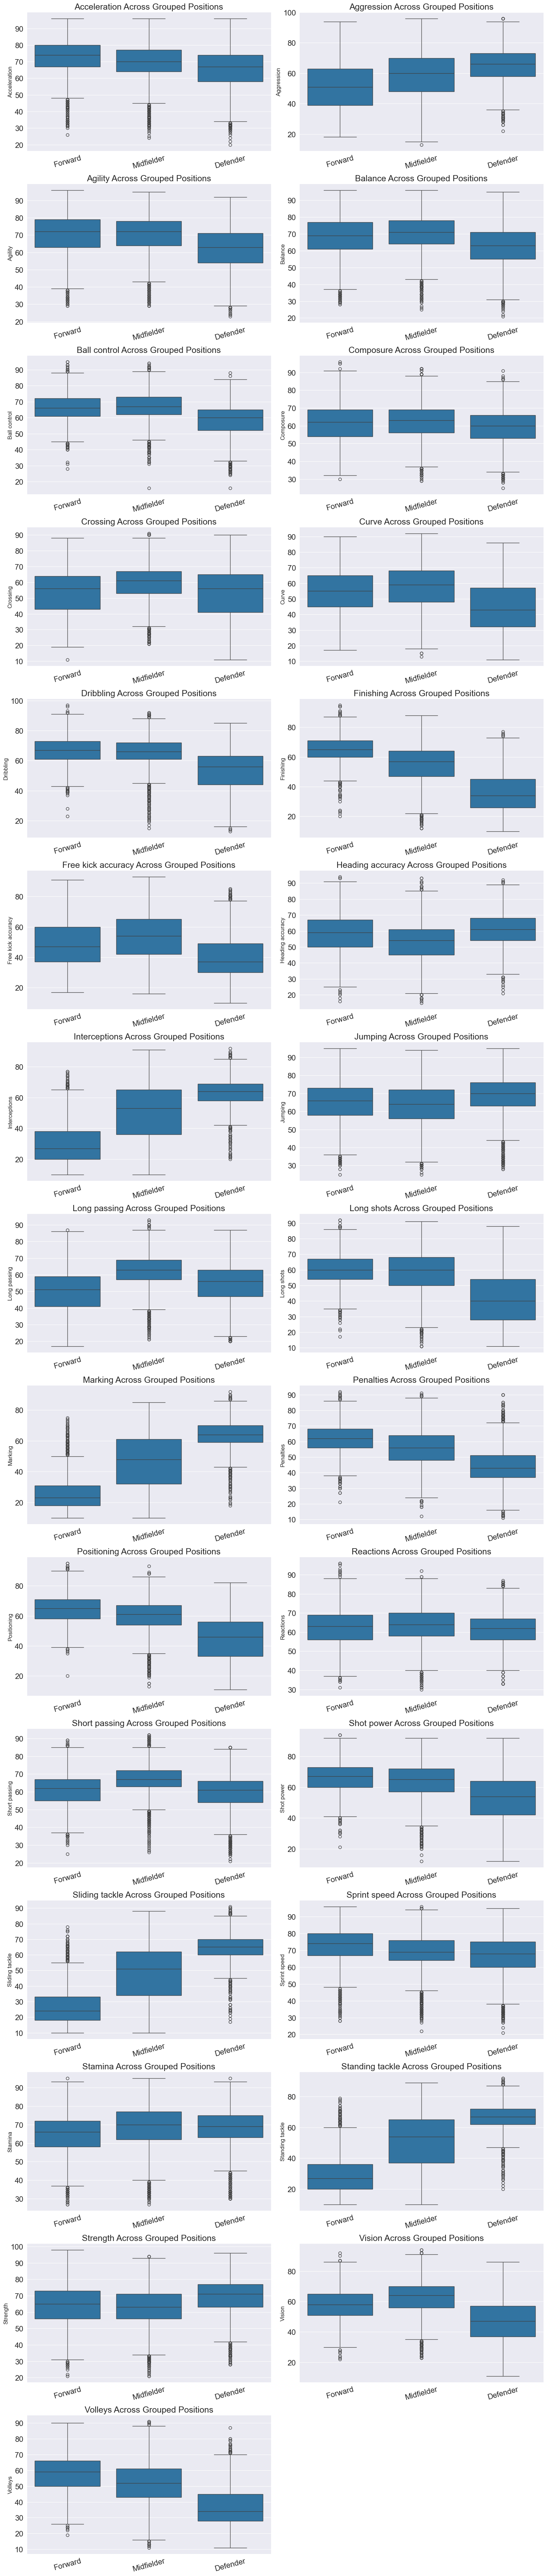

In [20]:
df['Grouped Positions'] = df['Preferred Positions'].map(position_mapping)

# Make a list of every column with a NUMERIC value 
numeric_columns = df.select_dtypes(include='number').columns

plots_per_row = 2

# Calculate rows and coloumns 
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / plots_per_row)

# Make figure
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  # Make the axes to a list

# Loop to make all the plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  # Remove the label of the x axis
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

# Remove useless boxplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()


We see that different positions has different types of strong attributes. Also the dots over and under the boxes shows that we have alot of outliers in some attributes.

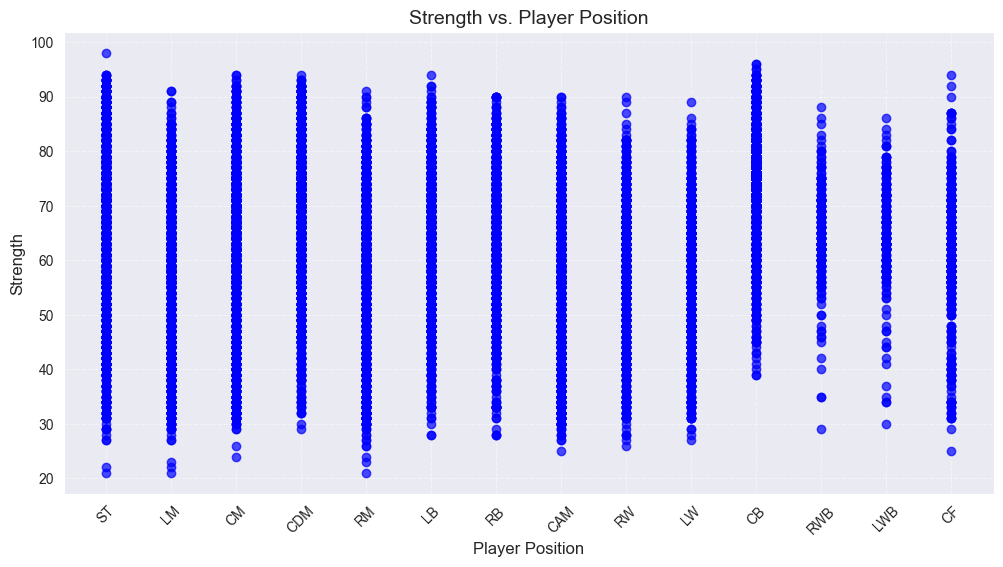

In [21]:
# Trying out scatter plotting
plt.figure(figsize=(12, 6))
positions = df['Preferred Positions'] # X
strength = df['Strength']  # Y

plt.scatter(positions, strength, alpha=0.7, color='blue')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Strength vs. Player Position', fontsize=14)
plt.xticks(rotation=45)  # Rotate X labels, better read ability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can clearly see that Strength is a clear attribute for defensive positions.

In [22]:
df_Normal = pd.read_csv("./FIFA18_players_database/clean_data_normalized.csv")
df_Normal.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.648148,0.346154,0.750000,0.277778,0.372093,0.48,0.428571,0.126761,0.470588,0.649351,...,0.325581,0.517241,0.2000,0.708333,0.566038,0.185185,0.750000,0.125000,0.480000,ST
1,0.722222,0.307692,0.714286,0.555556,0.302326,0.38,0.396825,0.352113,0.411765,0.545455,...,0.348837,0.465517,0.1375,0.520833,0.433962,0.135802,0.250000,0.339286,0.360000,LM
2,0.759259,0.679487,0.678571,0.407407,0.604651,0.58,0.492063,0.394366,0.627451,0.636364,...,0.604651,0.431034,0.6625,0.687500,0.716981,0.703704,0.678571,0.553571,0.746667,CM
3,0.666667,0.230769,0.517857,0.425926,0.418605,0.34,0.460317,0.422535,0.549020,0.623377,...,0.348837,0.551724,0.2750,0.541667,0.452830,0.234568,0.464286,0.428571,0.506667,ST
4,0.574074,0.679487,0.571429,0.500000,0.348837,0.36,0.380952,0.394366,0.196078,0.298701,...,0.488372,0.344828,0.6625,0.604167,0.490566,0.679012,0.642857,0.250000,0.426667,CDM


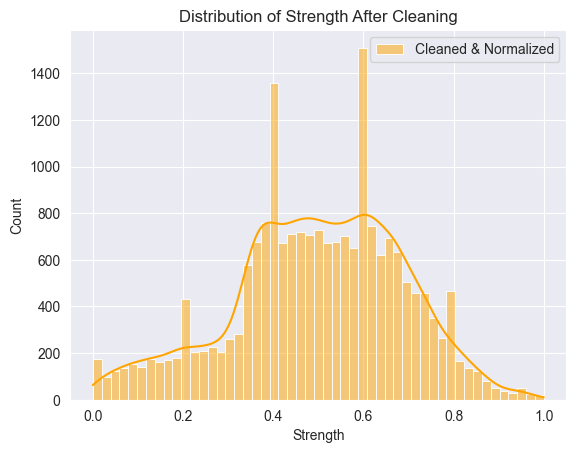

In [23]:
sns.histplot(df_Normal['Strength'], kde=True, color='orange', label='Cleaned & Normalized')
plt.legend()
plt.title('Distribution of Strength After Cleaning')
plt.show()

We see now after normalization and removing outliers that we have a more even graph

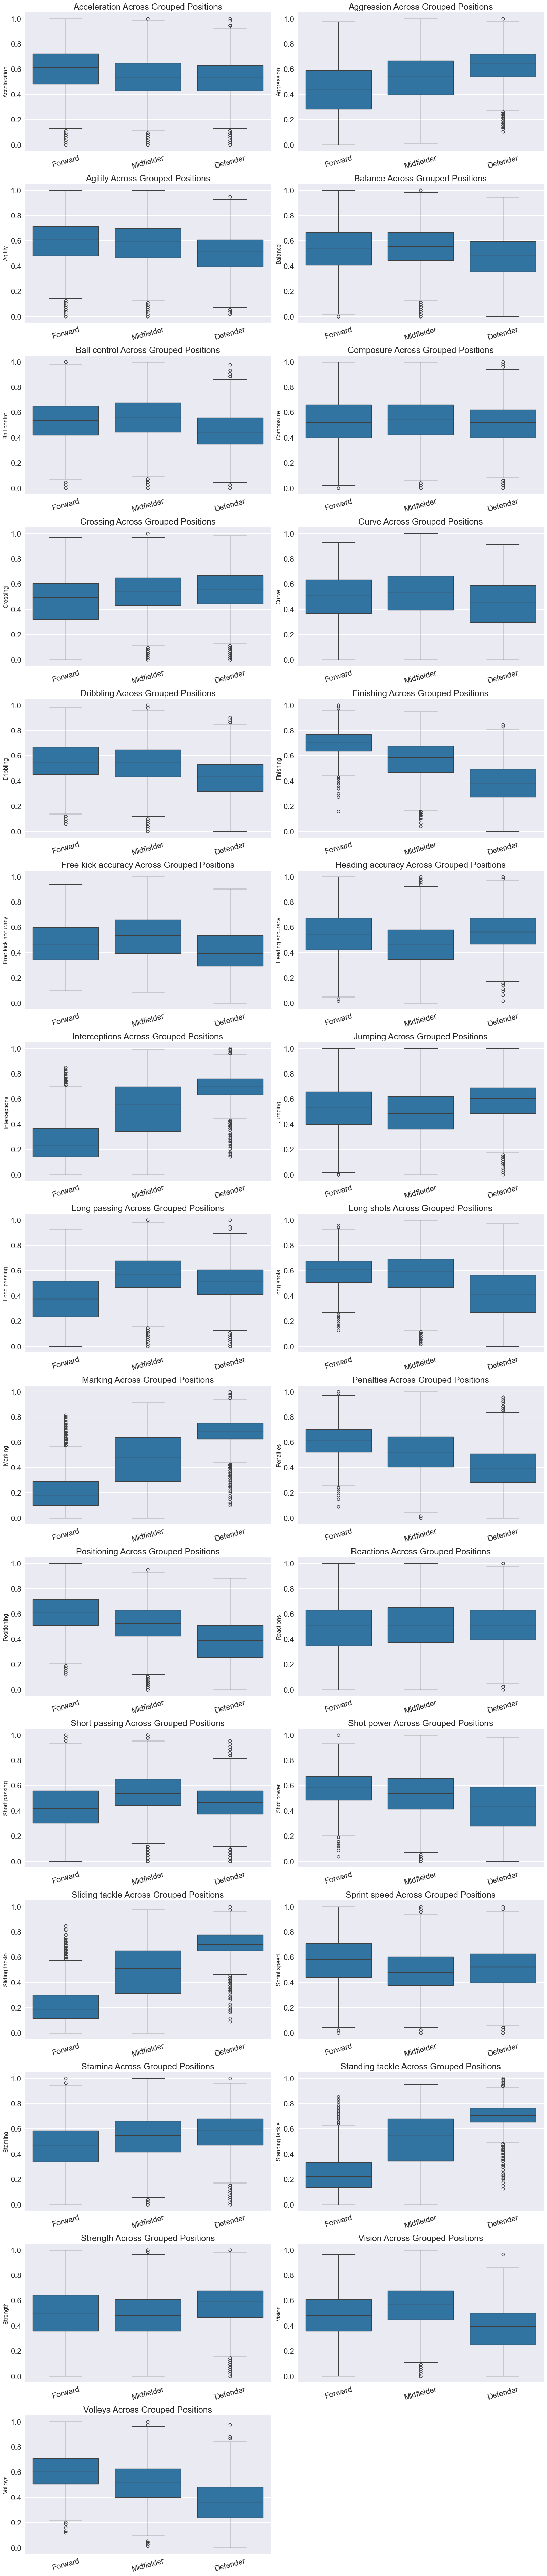

In [24]:
df_Normal['Grouped Positions'] = df_Normal['Preferred Positions'].map(position_mapping)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df_Normal, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
